# Lab - Transformada Z

*Processamento Digital de Sinais - UFPR - Prof. Eduardo Parente Ribeiro*

Esta atividade explora os conceitos da transformada Z para analizar o comportamento em frequência de sistemas discretos lineares e invariantes ao deslocamento.

In [34]:
from pylab import *
from scipy import signal

1) crie uma função H=respfreq(b,a,N) que retorne H, o vetor complexo que contem a resposta em frequência do sistema para N valores de frequencia entre 0 e $\pi$. 

In [35]:
def respfreq(b, a, N):
    """
    Calcula a resposta em frequencia de um filtro IIR definido pelos coef. b, a 
    para valores de N frequencias digitais entre zero e pi
    Retorna o vetor de frequencias w, e o vetor complexo H
    """
    H = empty(N, dtype='complex')
    w = linspace(0, pi, N, endpoint=False)
    
    for i in range(N):
        z = exp(1j * w[i])  # Transformada Z complexa
        H[i] = sum(b * (z**arange(len(b)))) / sum(a * (z**arange(len(a))))
    
    return w, H


2) Considere o sistema $y[n]=T\{x[n]\}$, linear,invariante ao deslocamento, determinado pela EDCC:
$ y[n]= 1,5y[n-1]-0,7y[n-2]+0.3x[n]+0.2x[n-1]+0.1x[n-2]$

Plote no mesmo eixo a resposta em frequencia deste sistema usando respfreq() com 100 valores (linha) e freqz() com 40 valores (simbolo 'o').


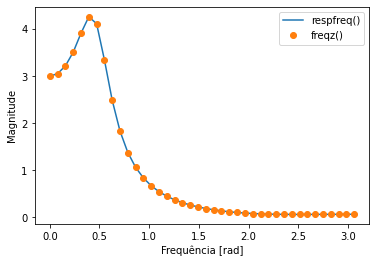

In [36]:
# Coma base no enunciado, temos os seguintes coeficientes:
b = [0.3, 0.2, 0.1]
a = [1, -1.5, 0.7]

# Utilizando a função freqz(), vamos adquirir a resposta em frequência com 40 pontos de dados
w_freqz, H_freqz = signal.freqz(b, a, worN=40)

# Utilizando a função respfreq(), vamos obter a resposta em frequência para os mesmos pontos acima na frequência digital
w_resp, H_resp = respfreq(b, a, len(w_freqz))  

# Plot da resposta em frequência
figure()
plot(w_resp, abs(H_resp), label='respfreq()')
plot(w_freqz, abs(H_freqz), 'o', label='freqz()')
xlabel('Frequência [rad]')
ylabel('Magnitude')
legend()
show()


3) Informe os pólos e zeros deste sistema

In [37]:
# zeros do sistema
zeros = roots(b)

# polos do sistema
polos = roots(a)

print("Zeros do sistema:", zeros)
print("Polos do sistema:", polos)

Zeros do sistema: [-0.33333333+0.47140452j -0.33333333-0.47140452j]
Polos do sistema: [0.75+0.37080992j 0.75-0.37080992j]


4) plote o diagrama de pólos e zeros

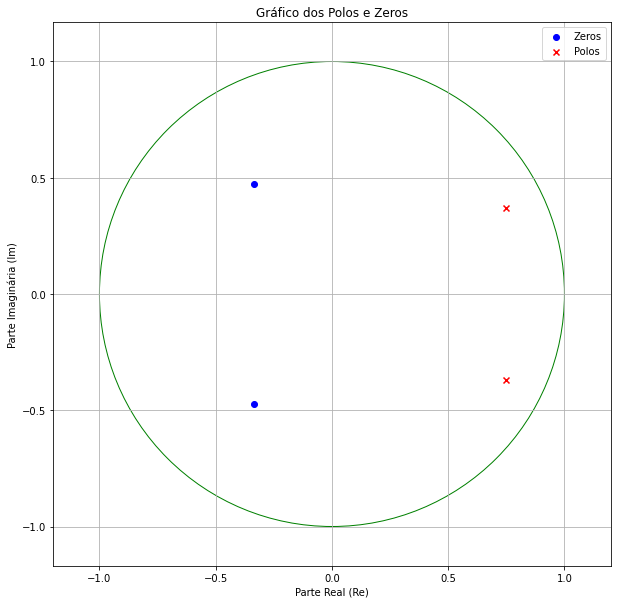

In [42]:
# Plotagem do diagrama de polos e zeros
figure(figsize=(10, 10))
scatter(real(zeros), imag(zeros), marker='o', color='b', label='Zeros')
scatter(real(polos), imag(polos), marker='x', color='r', label='Polos')

# Plotar o círculo unitário
circle = Circle((0, 0), 1, fill=False, color='g')
gca().add_patch(circle)

xlabel('Parte Real (Re)')
ylabel('Parte Imaginária (Im)')
title('Gráfico dos Polos e Zeros')
grid()
legend()
axis('equal')  # Garantir a mesma escala nos eixos x e y
xlim([-1.2, 1.2])  # limites do plot 
ylim([-1.2, 1.2])  # limites do plot
show()
